IMPORTING LIBRARIES AND DATASET


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import tz

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "aayushmaantawer"
os.environ['KAGGLE_KEY'] = ""
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 88% 71.0M/80.9M [00:00<00:00, 253MB/s]
100% 80.9M/80.9M [00:00<00:00, 249MB/s]


In [ ]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
!wget https://www.dropbox.com/s/ymqktkwfstigvxn/training.1600000.processed.noemoticon%5B1%5D.csv?dl=0

--2024-05-06 14:55:32--  https://www.dropbox.com/s/ymqktkwfstigvxn/training.1600000.processed.noemoticon%5B1%5D.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ymqktkwfstigvxn/training.1600000.processed.noemoticon%5B1%5D.csv [following]
--2024-05-06 14:55:32--  https://www.dropbox.com/s/raw/ymqktkwfstigvxn/training.1600000.processed.noemoticon%5B1%5D.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0398fb86602c099253167c8468.dl.dropboxusercontent.com/cd/0/inline/CSby361Q665V3e7ZGapnBGOHEVUzsMRJhgmTOrM-aj9_uoWiwVCb3vVLlproUvaspPCR3KS0ZiLQEcLWNF0WqybhTATTKH2sCSJUT8Tnavc39JDVxs_T2O7UWb_-inXP6Y4CpqHv5zu8F0Y8kPvsqqw6/file# [following]
--2024-05-06 14:55:32--  https://uc0398fb86602c099253167c8468.dl.dropboxusercontent.com/c

In [ ]:
import pandas as pd
import io
#defining columns
DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 100  # default=20
# Reading the CSV file
tsa = pd.read_csv('training.1600000.processed.noemoticon[1].csv?dl=0', engine='python', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Display the DataFrame
print(tsa)




         target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww

In [ ]:
#Checking for missing values
missing_values = tsa.isnull().sum()
print(missing_values)



target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [ ]:
# Check for duplicate instances
duplicates = tsa.duplicated().sum()
print(duplicates)

0


So we can conclude There are no missing values in the dataset. Also it was observed that there are no duplicate tweets in the dataset which was identified using the duplicated() function

---



<ipython-input-16-d0a5edd3f750>:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tsa['date_only'] = pd.to_datetime(tsa['date'], infer_datetime_format=True).dt.tz_convert('America/Los_Angeles')


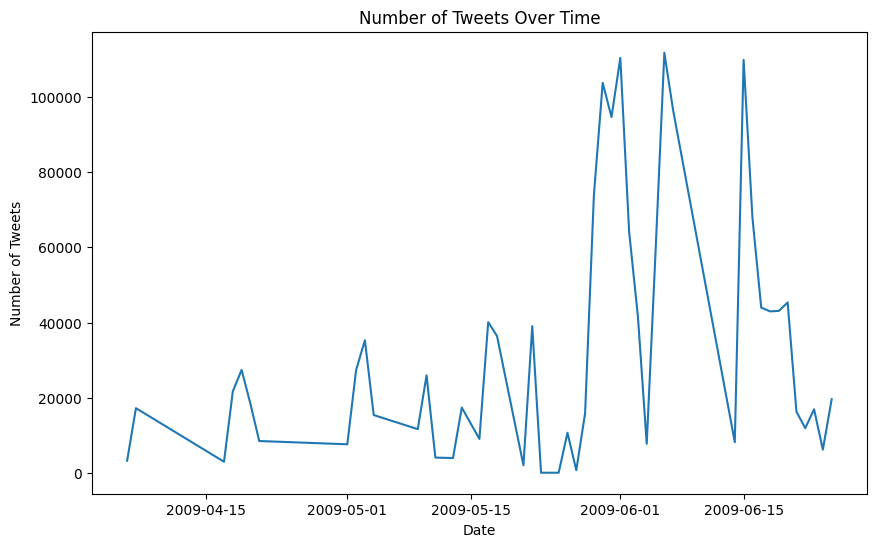

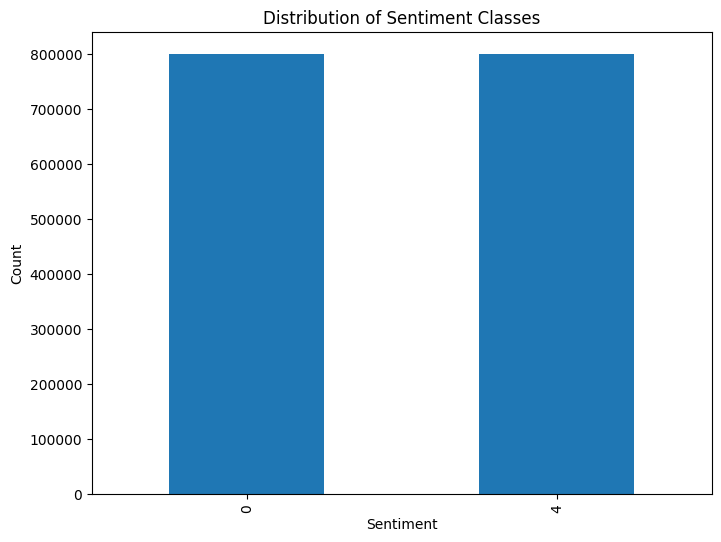

In [ ]:
import pandas as pd
from pandas._libs.tslibs import timestamps
import pytz

# Assuming 'tsa' is your DataFrame
tsa['date_only'] = pd.to_datetime(tsa['date'], infer_datetime_format=True).dt.tz_convert('America/Los_Angeles')

# Extract the date component and assign it directly to the DataFrame
tsa['date_only'] = pd.to_datetime(tsa['date']).dt.date

# Analyze patterns or trends based on the date
date_counts = tsa['date_only'].value_counts().sort_index()
date_counts.plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time')
plt.show()

# Plot
sentiment_counts = tsa['target'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Classes')
plt.show()



From the graph we can conclude that the most number of tweets are posted in the month of JUNE. The distribution of positive and negative tweets is equal.
Also, the date of tweets and the sentiment has no relation.

[Text(0, 0.5, 'NO. OF TWEETS')]

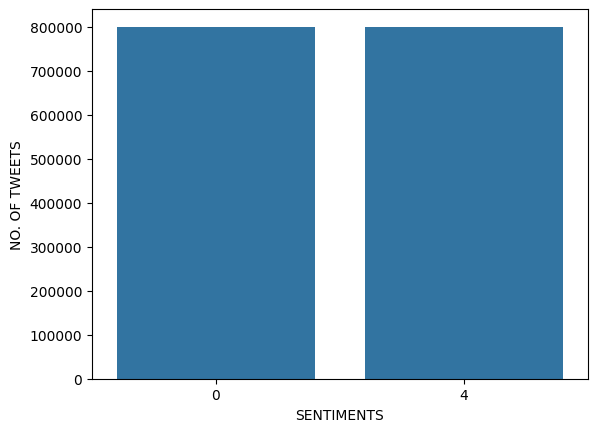

In [ ]:
import seaborn as sns
plot=sns.countplot(x=tsa['target'])
plot.set(xlabel='SENTIMENTS')
plot.set(ylabel='NO. OF TWEETS')

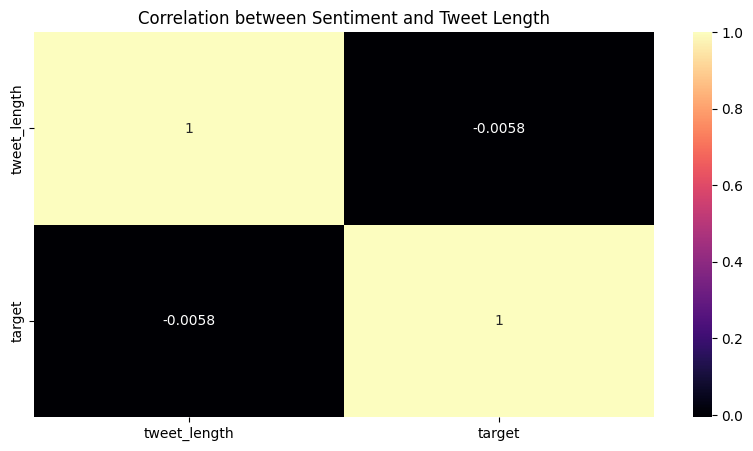

In [ ]:
import seaborn as sns
tsa['tweet_length'] = tsa['text'].apply(len)

correlation = tsa[['tweet_length', 'target']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, cmap='magma')
plt.title('Correlation between Sentiment and Tweet Length')
plt.show()


This indicates that the length of the tweets has very little impact on the sentiment expressed in the tweets. The tweet length and sentiment are essentially independent of each other.

In [ ]:
encoded_tsa = pd.get_dummies(tsa['target'])

sentiment_mapping = {
    0: 'negative',
    2: 'neutral',
    4: 'positive'
}
encoded_tsa.rename(columns=sentiment_mapping, inplace=True)
if 'neutral' not in encoded_tsa.columns:
    encoded_tsa['neutral'] = 0
df_encoded = pd.concat([tsa, encoded_tsa], axis=1)
df_encoded.drop('target', axis=1, inplace=True)
print(df_encoded)


                ids                      date      flag             user  \
0        1467810369 2009-04-06 22:19:45-07:00  NO_QUERY  _TheSpecialOne_   
1        1467810672 2009-04-06 22:19:49-07:00  NO_QUERY    scotthamilton   
2        1467810917 2009-04-06 22:19:53-07:00  NO_QUERY         mattycus   
3        1467811184 2009-04-06 22:19:57-07:00  NO_QUERY          ElleCTF   
4        1467811193 2009-04-06 22:19:57-07:00  NO_QUERY           Karoli   
...             ...                       ...       ...              ...   
1599995  2193601966 2009-06-16 08:40:49-07:00  NO_QUERY  AmandaMarie1028   
1599996  2193601969 2009-06-16 08:40:49-07:00  NO_QUERY      TheWDBoards   
1599997  2193601991 2009-06-16 08:40:49-07:00  NO_QUERY           bpbabe   
1599998  2193602064 2009-06-16 08:40:49-07:00  NO_QUERY     tinydiamondz   
1599999  2193602129 2009-06-16 08:40:50-07:00  NO_QUERY   RyanTrevMorris   

                                                      text   date_only  \
0        @swi